<a href="https://colab.research.google.com/github/audirisper/kamilimu_assignments/blob/Risper_statistical_analysis/Assignment4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

SECTION 1

1. a) Sample- A sample is asubset of individuals or observations selected  from a larger group or population. It is used to make inferences about the popuation.

   b) Population- A population is the entire group of individuals or observations that a researcher is interested in studying or drawing conclusions about.

2. A confidence interval provides a range of values that is likely to contain the true population parameter (such as a mean or proportion) with a specified level of confidence (95%). It reflects the degree of uncertainty around the estimate.

3. A hypothesis is a specific, testable statement or assumption about a population parameter. It is a prediction or assumption that is tested using statistical methods.

4. a) Null hypothesis- the statement we are trying to disprove.
A statement of no effect, no change, or no difference: the difference is not statistically significant.
Example: There is no difference between group A and group B.

   b) Alternative hypothesis- he statement we accept if we find sufficient evidence to disprove the null hypothesis.It proposes that there is a significant effect, change or difference.
   Example:There is a difference between group A and group B.

5. Hypothesis testing is a statistical method used to make decisions about population parameters based on sample data. We test the null hypothesis (H₀) to determine whether there is enough evidence to reject it in favor of the alternative hypothesis.

6.  Steps in Hypothesis testing:

  - State the null and alternative hypotheses.
  - Choose a significance level (α), e.g., 0.05.
  - Select the appropriate statistical test based on data type and    distribution.
  - Calculate the test statistic and p-value.
  - Compare the p-value to α:
     If p ≤ α, reject H₀.
     If p > α, fail to reject H₀.
  - Draw a conclusion based on the result.

7. Alpha (α) is the significance level, which is the probability of rejecting the null hypothesis when it is actually true. It represents the tolerance for Type I error. Common values are 0.05 or 0.01.

8. If p-value ≤ α, the null hypothesis is rejected (statistically significant result).
   
   If p-value > α, we fail to reject the null hypothesis (not statistically significant).

9. Parametric tests assume:
   - The data are normally distributed.
   - The data have homogeneity of variance (equal variances).
   - The data are measured at an interval or ratio scale.
   - The samples are independent.

10. The Shapiro-Wilk test is commonly used to test the normality of a dataset.


In [ ]:
import pandas as pd

athletes = pd.read_csv("https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2021/2021-07-27/athlete_events.csv")

a. State the hypotheses:

   Null Hypothesis (H₀)- There is no significant difference in average height between male and female athletes.

   Alternative Hypothesis (H₁)- There is a significant difference in average height between male and female athletes.

b. Choose the statistical test

   - Data type: Height is a numerical variable.
   - Groups: We are comparing two independent groups (males vs. females).
   - Number of Groups: Two (male vs. female).
   - Assumptions: Normal distribution,  Equal variances
   - Test for Normality: We need to check if the height data for both groups is normally distributed, as this influences whether we use a parametric or non-parametric test.(Shapiro-Wilk recommended): Due to the small sample size, normality testing could be unreliable.However, because height in human populations tends to be normally distributed, we assume normality for this educational analysis.In real-world research, we'd use scipy.stats.shapiro() to test this.
   - Test for Equality of Variances: We need to check if the variances of the two groups are equal, as this determines whether we use a standard t-test or a Welch’s t-test. If p-value from Levene's test ≤ 0.05 → variances are unequal → use Welch’s t-test. If p > 0.05 → use standard two-sample t-test.

c. Justification for test choice
If:
   - The height data for both groups is approximately normally distributed, and
   - The variances of the two groups are equal, We use the Independent Samples t-test (parametric).

In [ ]:
import pandas as pd
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset (assuming it's already read into df)
athletes = pd.read_csv("https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2021/2021-07-27/athlete_events.csv")

# Filter to only male and female athletes with valid (non-null) height
athletes_gender_height = athletes[['Sex', 'Height']].dropna()
athletes_gender_height = athletes_gender_height[athletes_gender_height['Sex'].isin(['M', 'F'])]

# Create two separate groups
male_heights = athletes_gender_height[athletes_gender_height['Sex'] == 'M']['Height']
female_heights = athletes_gender_height[athletes_gender_height['Sex'] == 'F']['Height']


In [ ]:
# Normality test
print("Shapiro-Wilk Test:")
print("Male:", stats.shapiro(male_heights))
print("Female:", stats.shapiro(female_heights))


Shapiro-Wilk Test:
Male: ShapiroResult(statistic=np.float64(0.9971359336541346), pvalue=np.float64(1.7291477135912297e-40))
Female: ShapiroResult(statistic=np.float64(0.9957406211413513), pvalue=np.float64(9.918041215477713e-38))


/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 143567.
  res = hypotest_fun_out(*samples, **kwds)
/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 67378.
  res = hypotest_fun_out(*samples, **kwds)


In [ ]:
# Variance test
levene_result = stats.levene(male_heights, female_heights)
print("Levene's Test:", levene_result)


Levene's Test: LeveneResult(statistic=np.float64(494.37845930272937), pvalue=np.float64(2.1243629849629428e-109))


In [ ]:
# Independent Samples T-Test
t_stat, p_value = stats.ttest_ind(male_heights, female_heights, equal_var=True)  # or False based on Levene's result
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")


T-statistic: 257.0759194444727
P-value: 0.0


g. Conclusion & Interpretation
Compare the p-value to α = 0.05:

If p ≤ 0.05 → Reject H₀: There is a significant difference in height between male and female athletes.

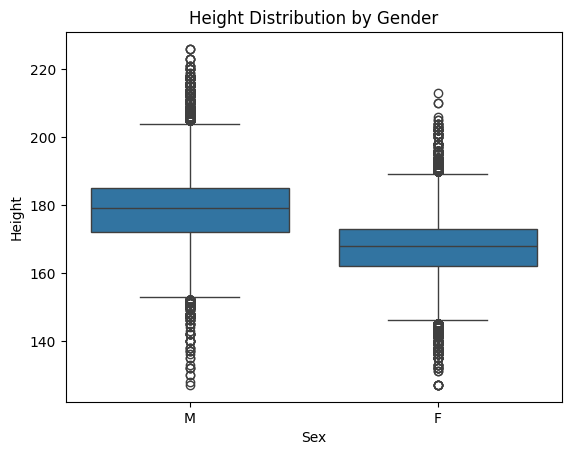

In [ ]:
# quick visualizing
sns.boxplot(x='Sex', y='Height', data=athletes_gender_height)
plt.title("Height Distribution by Gender")
plt.show()
